# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Dataframe

In [2]:
# Define path
path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Python\03-2022 Instacart Basket Analysis'

In [3]:
# Import most recent Instacart dataframe as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe_v1.pkl'))

# 03. Creating Visualizations

In [4]:
# Setting chart size to be larger
plt.rcParams["figure.figsize"] = (10,6)

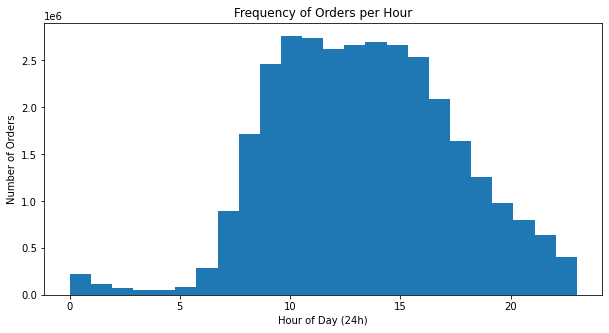

In [20]:
# Histogram for order_hour_of_day
hist = df['order_hour_of_day'].plot.hist(bins = 24)
hist.set_xlabel('Hour of Day (24h)')
hist.set_ylabel('Number of Orders')
hist.set_title('Frequency of Orders per Hour')
plt.subplots_adjust(bottom=.25)

This histogram demonstrates the frequency of products being ordered (not individual orders) at each hour of the day on average, via a 24h metric.

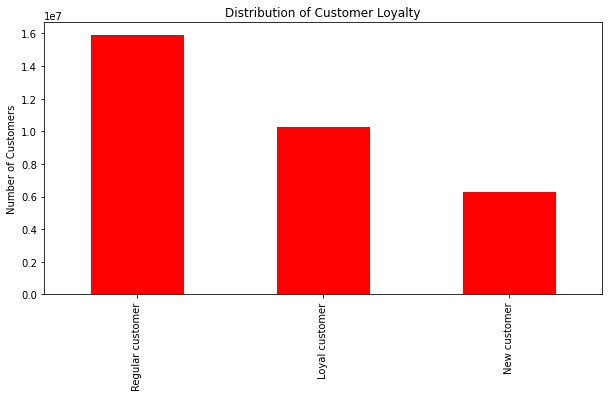

In [13]:
# Bar chart for loyalty_flag
bar = df['loyalty_flag'].value_counts().plot.bar(color = 'red')
bar.set_ylabel('Number of Customers')
bar.set_title('Distribution of Customer Loyalty')
plt.subplots_adjust(bottom=.25)

Regular customers make up about half of all customers. Loyal customers outnumber new customers, making up about 30% and 20% respectively.

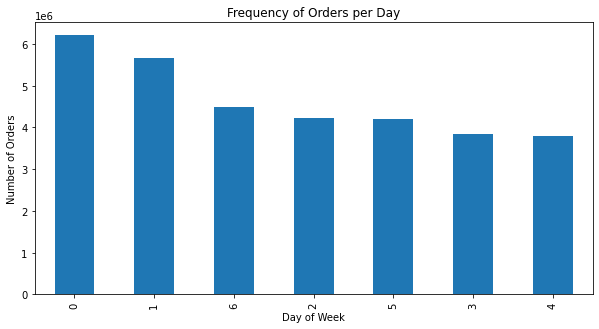

In [18]:
# Adding a better bar_orders_dow for final presentation (after the fact)
bar_2 = df['orders_day_of_week'].value_counts().plot.bar()
bar_2.set_xlabel('Day of Week')
bar_2.set_ylabel('Number of Orders')
bar_2.set_title('Frequency of Orders per Day')
plt.subplots_adjust(bottom=.25)

In [8]:
# Sampling data in preparation for line chart
# Setting seed and producing boolean list for 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [9]:
# 70/30 split of df
big = df[dev]    # 70%
small = df[~dev] # 30%

In [10]:
# Checking lengths to ensure successful split
len(df)

32429932

In [11]:
# Successful split
len(big) + len(small)

32429932

In [12]:
# Create 30% subset of dataframe, with only necessary columns for upcoming line chart
df_2 = small[['order_hour_of_day', 'prices']]

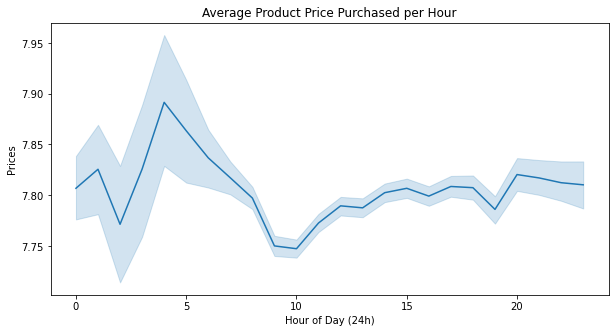

In [13]:
# Create line plot of order_hour_of_day vs. prices with new subset
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')
line.set_xlabel('Hour of Day (24h)')
line.set_ylabel('Prices')
line.set_title('Average Product Price Purchased per Hour')
plt.subplots_adjust(bottom=.25)

Customers tend to buy slightly more expensive items on average late at night and slightly less expensive items early in the morning. This may reflect human willpower waning as the day goes on.

In [16]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spending_flag,frequency_flag,Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [19]:
df_3 = small[['Age', 'fam_status', 'income']]

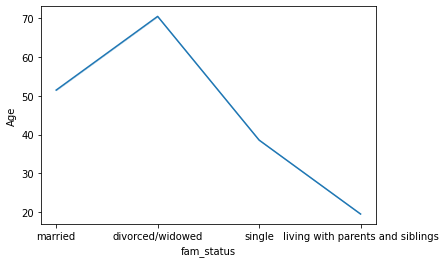

In [18]:
# Create line plot of Age vs family status
line_2 = sns.lineplot(data = df_3, x = 'fam_status', y = 'Age')

This line chart (which would certainly be better as a bar chart?) indicates an expected relationship between age and family status. Living with parents and siblings implies the youngest age, with "single" implying a slightly older average age of ~39. Average age for married folks is ~51 and that of divorced folks is ~70. The home -> marriage -> divorce pipeline demonstrates itself via our data.

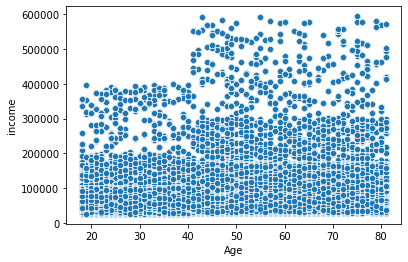

In [21]:
# Create scatterplot of Age vs income
scatterplot = sns.scatterplot(x = 'Age', y = 'income', data = df_3)

This scatterplot shows that anyone of any age can have any level of income, with the exception that people under 40 apparently *never* make more than 400,000. The vast majority of incomes lay between about 20,000 and 200,000 for all ages. Above 40 there's a significant amount that make between 200,000 and 300,000. Some outliers make even more.

In [21]:
# Exporting 5 visualizations
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day_bar.png'))

In [14]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution_bar.png'))

In [19]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [16]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_per_hour_line.png'))

In [25]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.9 line chart 2.png'))

In [26]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.9 scatterplot.png'))